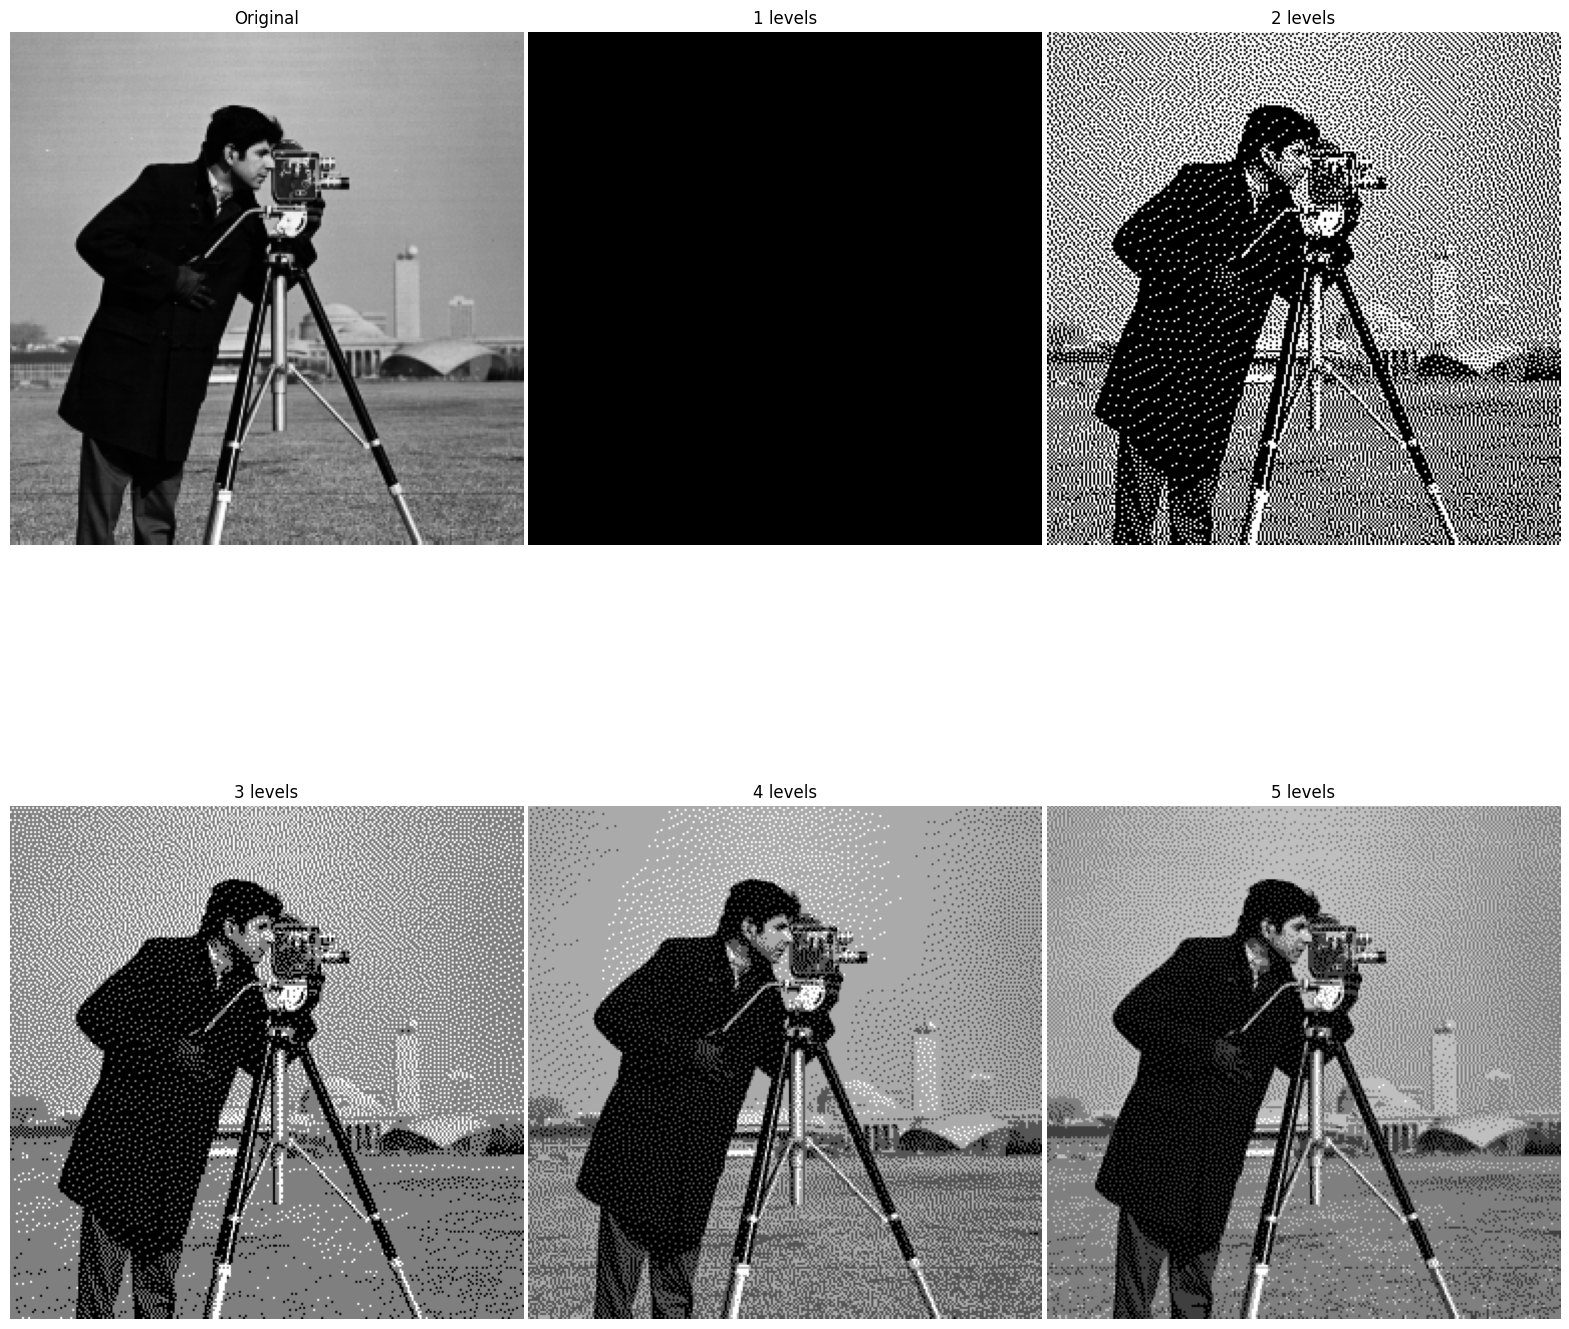

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Global variable for quantization levels
levels = 5


def load_and_convert_image(image_file):
    """
    Load and convert the image to grayscale and then to normalized float array.
    """
    img = Image.open(image_file).convert("L")  # Load the image and convert to grayscale
    img_array = np.array(img, dtype=float) / 255.0  # convert to float and normalize

    return img_array


def find_nearest(array, value):
    """
    Find the value in the array that is closest to the given value.
    """
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]


def error_diffusion(image_file, levels):
    """
    Apply error diffusion on the image using given quantization levels.
    """
    # Load and convert the image
    img_array = load_and_convert_image(image_file)

    # Create the quantization levels
    quant_values = np.linspace(0, 1, levels)

    # Create an output array
    output_array = np.zeros_like(img_array)

    # Apply error diffusion
    for i in range(img_array.shape[0]):
        for j in range(img_array.shape[1]):
            original = img_array[i, j]
            closest_quant = find_nearest(quant_values, original)
            output_array[i, j] = closest_quant
            error = original - closest_quant

            # Propagate the error to adjacent pixels
            if j + 1 < img_array.shape[1]:
                img_array[i, j + 1] += error * 7 / 16
            if i + 1 < img_array.shape[0]:
                img_array[i + 1, j - 1 if j > 0 else j] += error * 3 / 16
                img_array[i + 1, j] += error * 5 / 16
                if j + 1 < img_array.shape[1]:
                    img_array[i + 1, j + 1] += error * 1 / 16

    # Convert back to 8 bit
    output_array = (output_array * 255).astype(np.uint8)

    return output_array


def display_images(image_file, levels):
    """
    Display original and diffused images.
    """
    # Create a figure to display the images
    fig, axs = plt.subplots(2, 3, figsize=(20, 20))

    # Load and display the original image
    img = Image.open(image_file).convert("L")
    axs[0, 0].imshow(img, cmap='gray')
    axs[0, 0].set_title('Original')
    axs[0, 0].axis('off')

    # Create and display the diffused images
    for i in range(1, levels + 1):
        output_image = error_diffusion(image_file, i)
        axs[i // 3, i % 3].imshow(output_image, cmap='gray')
        axs[i // 3, i % 3].set_title(f'{i} levels')
        axs[i // 3, i % 3].axis('off')

    plt.subplots_adjust(wspace=0.01, hspace=0.01)
    plt.savefig("output.png")
    plt.show()


# Use the functions
image_file = "cameraman.jpg"
display_images(image_file, levels)